In [22]:
import numpy as np
import operator
from math import sqrt
def createDataSet():
    group = np.array([[10,9],[10,11],[0,0],[0,1]])
    labels = ['A','A','B','B']
    return group, labels

In [23]:
group,labels = createDataSet()

In [50]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
        return sqrt(distance)

#get closer neighbors for the value of k
def get_neighbors(train, labels, test_row, k):
    distances = list()
    for train_row,lab in zip(train, labels):
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, lab, dist))
    distances.sort(key=lambda tup: tup[2])
    neighbors = list()
    for i in range(k):
        neighbors.append((distances[i][0], distances[i][1]))
    return neighbors


# Make a classification prediction with neighbors
def predict_classification(train, labels, test_row, k):
    neighbors = get_neighbors(train, labels, test_row, k)
    print(neighbors)
    output_values = [each[-1] for each in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [51]:
# classify0([0,0], group, labels, 3)

In [57]:
prediction = predict_classification(group, labels, [0,0], 3)
print('Expected class ' + str(prediction))

[(array([0, 0]), 'B'), (array([0, 1]), 'B'), (array([10,  9]), 'A')]
Expected class B


In [ ]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
        return returnMat,classLabelVector

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
df = pd.read_csv('Classified Data')

In [64]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [65]:
#standardized for the same scale as larger values could affect distance.
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
scaler.fit(df.drop('TARGET CLASS', axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [69]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [70]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [71]:
df_feat

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x = df_feat
y = df['TARGET CLASS']
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=1) #k = 1

In [77]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [82]:
pred = knn.predict(x_test)

In [84]:
y_test

545    0
298    0
109    0
837    0
194    0
      ..
847    0
682    1
884    1
325    1
482    0
Name: TARGET CLASS, Length: 300, dtype: int64

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[145  14]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [81]:
error_rate = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

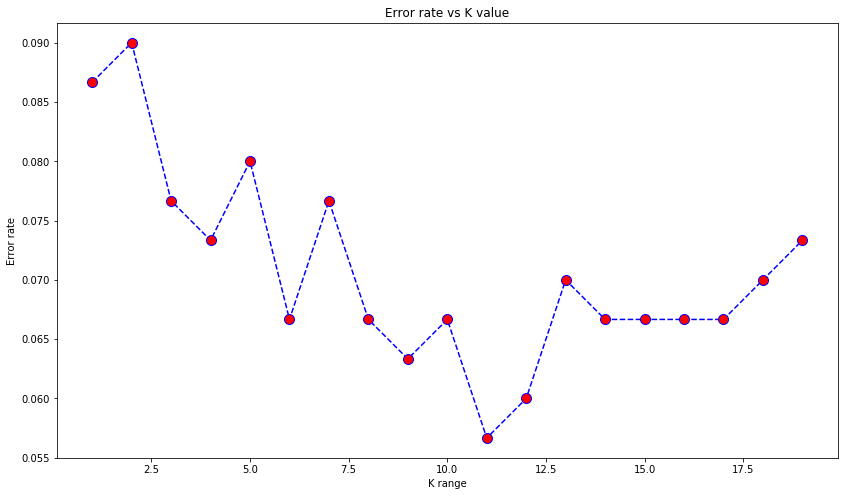

In [88]:
plt.figure(figsize = (14,8))
plt.plot(range(1,20), error_rate, color = 'blue', linestyle = "dashed", marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K value')
plt.xlabel('K range')
plt.ylabel('Error rate')

In [95]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train, y_train)
pred_new = knn.predict(x_test)
print(np.mean(pred_new != y_test))
print(confusion_matrix(y_test, pred_new))
print(classification_report(y_test, pred_new))

0.05333333333333334
[[150   9]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.94      0.95      0.94       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

